# Step 3
## Reding the universe of street complaint data and ACS data for calculating index

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pylab as plt
import json
import os
s = json.load(open(os.getenv('PUI2015')+'/nk1877.json'));
plt.rcParams.update(s)
#import Psycopg
% pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
loc=pd.read_csv('ulocations.csv')

In [37]:
## All data with no null lon lat values
twok5='https://data.cityofnewyork.us/resource/xk2u-49gx.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'
twok6='https://data.cityofnewyork.us/resource/txvy-sgqz.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'
twok7='https://data.cityofnewyork.us/resource/bjsb-smxa.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'
twok8='https://data.cityofnewyork.us/resource/ttef-akmb.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'
twok9='https://data.cityofnewyork.us/resource/76rq-desm.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'
y1016='https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'

In [38]:
streetdata = [twok5,twok6,twok7,twok8,twok9,y1016]

In [42]:
def scraper(readdata):
    year=5
    for i in readdata:
        data=pd.read_json(i)
        ar.append(data)
        data.to_csv('Raw/New/streetall'+str(year)+'.csv')
        year+=1
    

In [4]:
##Reading Data Set
d05=pd.read_csv("Raw/streetall5.csv")
d06=pd.read_csv("Raw/streetall6.csv")
d07=pd.read_csv("Raw/streetall7.csv")
d08=pd.read_csv("Raw/streetall8.csv")
d09=pd.read_csv("Raw/streetall9.csv")
d01016=pd.read_csv("/Users/nikhilkishore/Google Drive/Argo/Raw/streetall10.csv")

In [5]:
frames=[d05,d06,d07,d08,d09,d01016]

In [6]:
# Complete df of all the complaits of street condition for which location data is already available
df=pd.concat(frames)

In [7]:
# Dropping fields which are not needed
df=df.drop([u'x_coordinate_state_plane',
       u'x_coordinate_state_plane_', u'y_coordinate_state_plane',
       u'y_coordinate_state_plane_',u'location'],1)

In [8]:
## Shape of file for which we used google api to find location
loc.shape

(71663, 40)

In [9]:
## Shape of life for which we already haave location information
df.shape

(607875, 41)

In [19]:
dfstreet=pd.concat([df,loc])

In [65]:
dfstreet.shape

(679538, 41)

In [53]:
dfstreet2=dfstreet.drop('Unnamed: 0',1)#.reset_index()

In [63]:
dfstreet2=dfstreet2.reset_index(drop=True)

In [74]:
dfstreet3=dfstreet.copy()

In [79]:
import datetime
dfstreet3['created_date']=pd.to_datetime(dfstreet3['created_date'])

In [80]:
year=dfstreet3['created_date'].apply(lambda x:x.year)

## Map of geolocated through Google location API vs Alreaded geoLocated Map

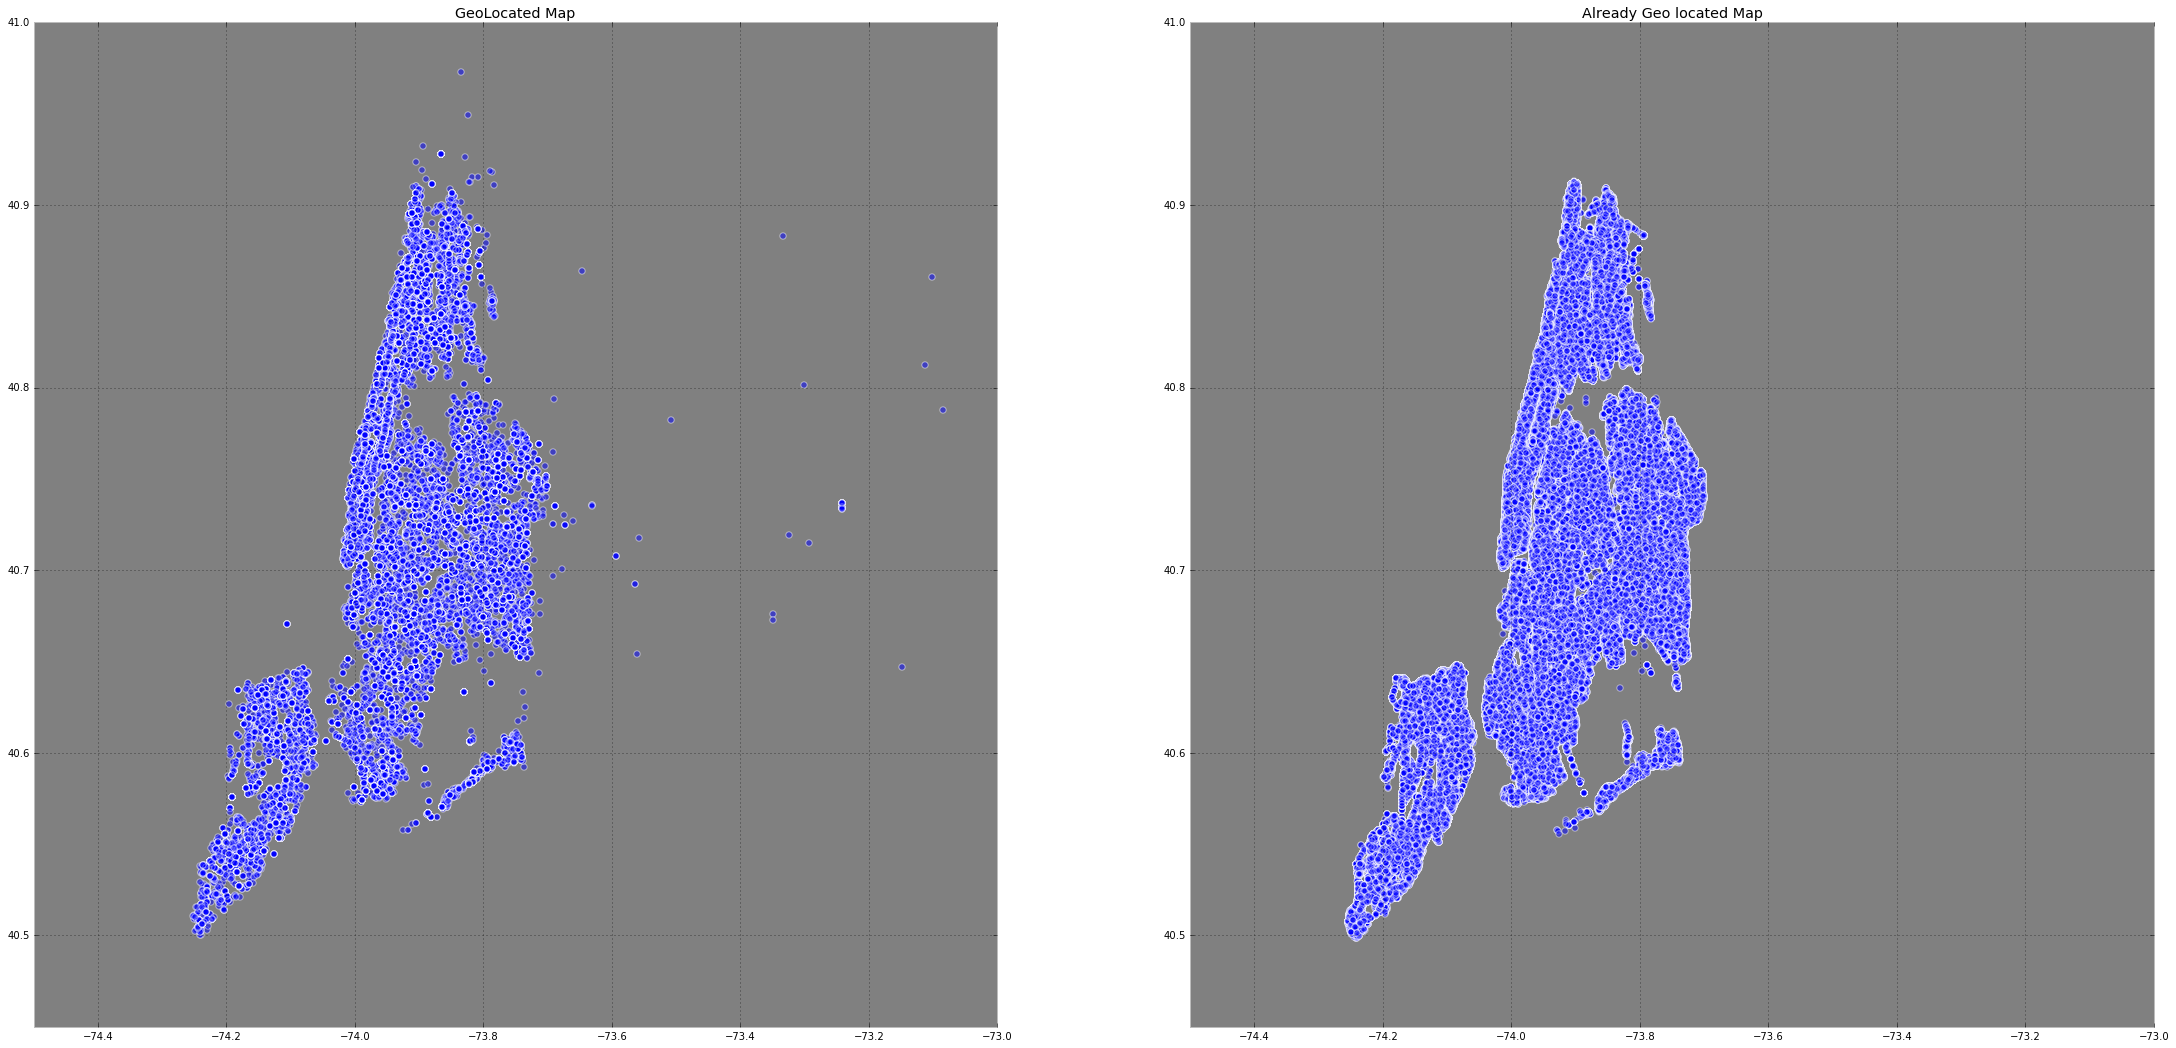

In [195]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(38,18))
for i,j in zip(ax,[loc,df]):
    i.scatter(j['longitude'],j['latitude'],s=40, alpha=.5, vmin=0, vmax=2)
    i.set_ylim([40.45,41])
    i.set_xlim([-74.5,-73])
    i.set_axis_bgcolor((0.5019607843137255, 0.5019607843137255, 0.5019607843137255))
ax[0].set_title("GeoLocated Map")
ax[1].set_title("Already Geo located Map")
#i.set_axis_bgcolor((0.5019607843137255, 0.5019607843137255, 0.5019607843137255))

## Complete map of New York City Street Condition complaits from 2005 to 2016. There are lot of outliers in the map.

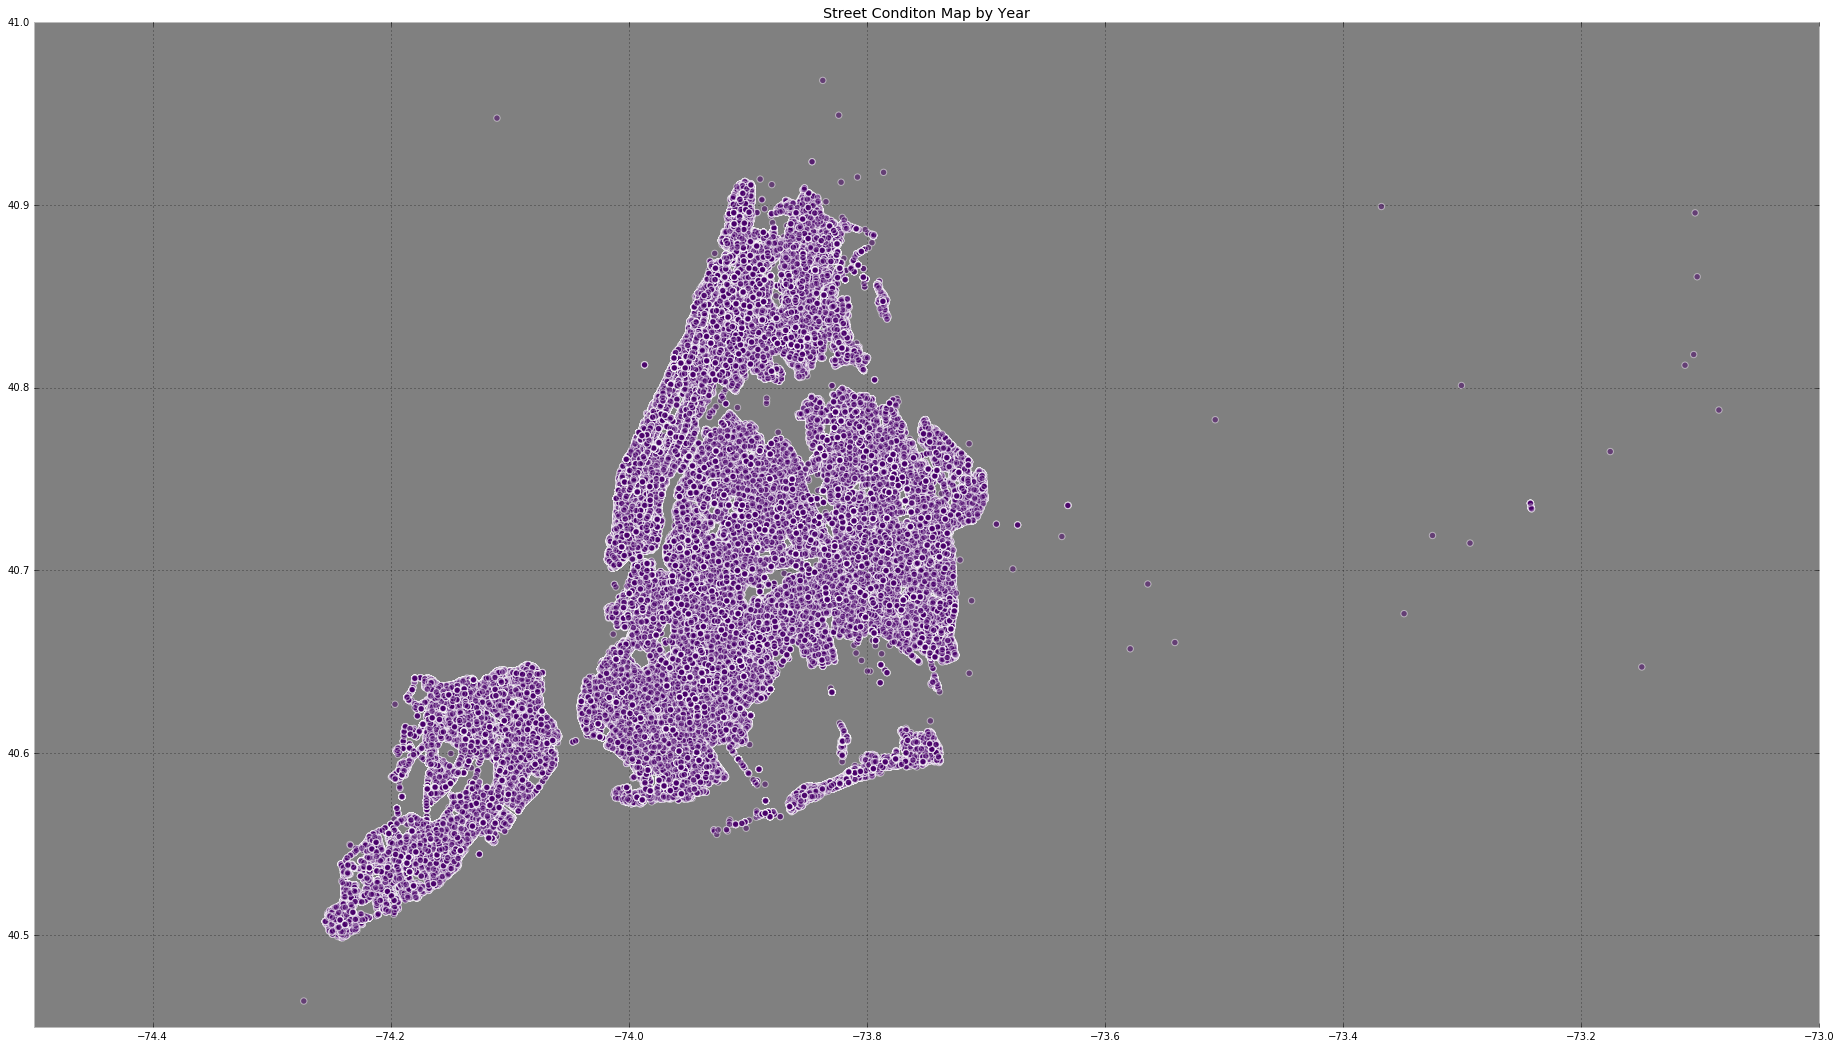

In [81]:
fig,ax = plt.subplots(figsize=(32,18))
ax.scatter(dfstreet3['longitude'],dfstreet3['latitude'],c=year,s=40, alpha=.5, cmap='RdPu', vmin=0, vmax=2)
plt.ylim(40.45,41)
plt.xlim(-74.5,-73)
plt.title("Street Conditon Map by Year")
ax.set_axis_bgcolor((0.5019607843137255, 0.5019607843137255, 0.5019607843137255))

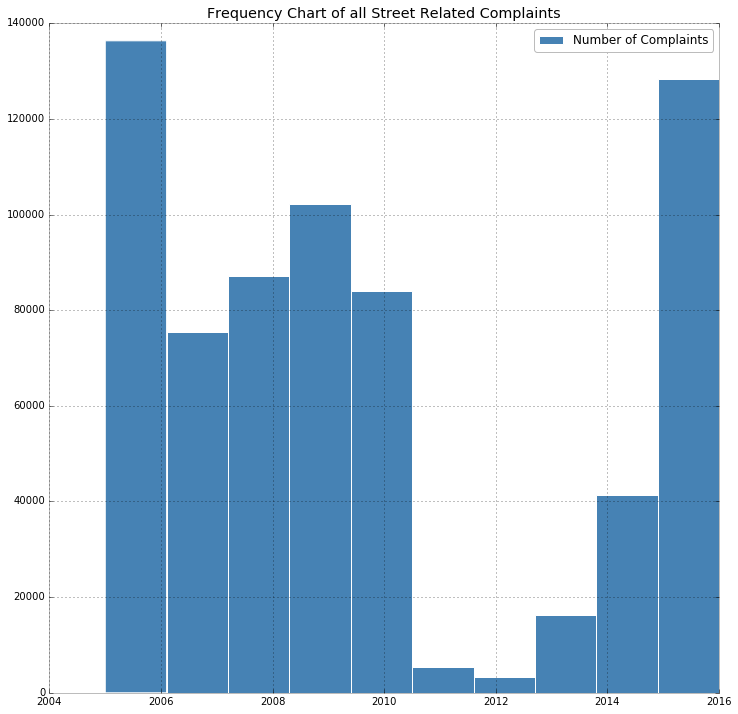

In [163]:
plt.figure(figsize=(12,12))
year.hist()
plt.legend(['Number of Complaints'])
plt.title('Frequency Chart of all Street Related Complaints')

In [164]:
## Creating a csv for final dataset
dfstreet.to_csv("Final/Final_Street.csv")

In [3]:
df=pd.read_csv("Final/finalfinal.csv")

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6,15,18,21,23,28,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


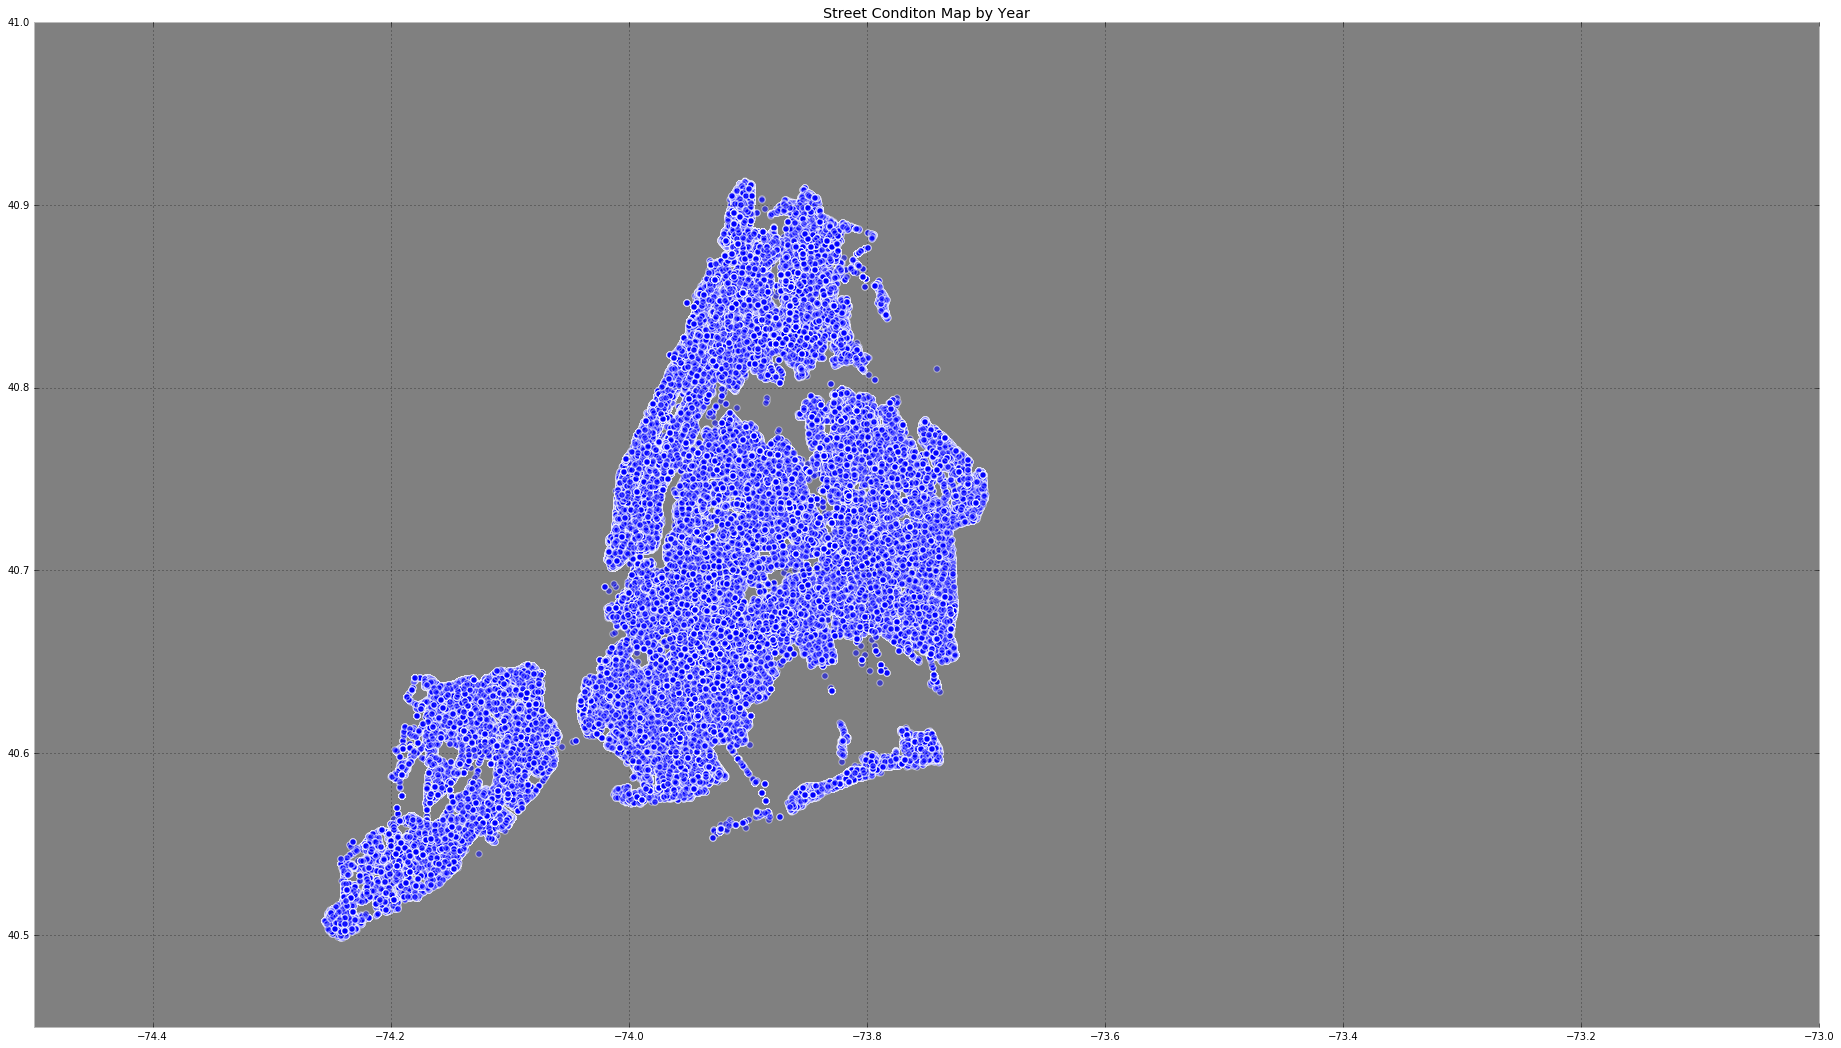

In [4]:
fig,ax = plt.subplots(figsize=(32,18))
ax.scatter(df['longitude'],df['latitude'],s=40, alpha=.5, cmap='RdPu', vmin=0, vmax=2)
plt.ylim(40.45,41)
plt.xlim(-74.5,-73)
plt.title("Street Conditon Map by Year")
ax.set_axis_bgcolor((0.5019607843137255, 0.5019607843137255, 0.5019607843137255))

In [5]:
df.shape

(679855, 42)

In [2]:
data=pd.read_csv('Final/master3.csv')

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6,15,18,21,23,28,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns

Index([u'Unnamed: 0', u'BoroCT2010', u'address_type', u'agency',
       u'agency_name', u'borough', u'bridge_highway_direction', u'city',
       u'closed_date', u'community_board', u'complaint_type', u'created_date',
       u'cross_street_1', u'cross_street_2', u'descriptor', u'due_date',
       u'facility_type', u'incident_address', u'incident_zip',
       u'intersection_street_1', u'intersection_street_2', u'landmark',
       u'latitude', u'location_type', u'longitude', u'park_borough',
       u'park_facility_name', u'resolution_action_updated_date',
       u'resolution_description', u'school_address', u'school_city',
       u'school_code', u'school_name', u'school_not_found', u'school_number',
       u'school_phone_number', u'school_region', u'school_state',
       u'school_zip', u'status', u'street_name', u'unique_key',
       u'derived_boroughs', u'located', u'BoroCT2010_1'],
      dtype='object')

In [4]:
data.created_date.min()

'2005-01-01T00:00:00.000'

In [5]:
data.created_date.max()

'2016-10-18 22:58:02'